In [81]:
pip install lxml beautifulsoup4 requests

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
from urllib.parse import unquote
from bs4 import BeautifulSoup
import re

source_url = "https://namu.wiki/RecentChanges"

req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table', attrs={'data-v-7468636f':''})
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + unquote(td_url[0].get('href'), encoding='utf-8')
        page_urls.append(page_url)

page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)

https://namu.wiki/w/다스 베이더
https://namu.wiki/w/로젠 메이든
https://namu.wiki/w/탐정학원Q/애니메이션 오리지널
https://namu.wiki/w/플레인스케이프 토먼트/기타 등장인물
https://namu.wiki/w/UEFA 유로파 리그/2020-21 시즌


In [2]:
from urllib import parse
from urllib.parse import unquote

req = requests.get(page_urls[1])
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='article')
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name='div', attrs={"class":'wiki-paragraph'})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print(category.text)
print(content_corpus)

아프리카TV 팀리그 시즌2 
아프리카TV 스타리그
  BLIZZARD eSports [ 펼치기 · 접기 ]하위 문서아프리카TV BJ(스타 BJ · 파트너 BJ · 프로게이머 BJ · 영구정지 BJ) · 방송용어문제점 · 사건사고(아프리카TV 갑질 논란)방송아프리카TV BJ대상 · TV 채널 · 나이스게임TVGSL · ASL · AWL · AfreecaTV TEKKEN League · AfreecaTV PUBG League · 팀리그 · BJ 멸망전 · 레이디스 · LOL 플랫폼 대항전대표이사문용식(前) · 서수길(現)커뮤니티인터넷방송 갤러리 · 에펨코리아 아프리카TV 게시판 · 코프리카경기장프릭업 스튜디오 · HOT6 아프리카 콜로세움Afreeca FreecsLoL · 하스스톤 · PUBG · 스타크래프트 2 · 카트라이더스타크래프트 2(2016) · 오버워치기타BJ · 별풍선 · 스티커 · 별창녀 · 별풍셔틀 · 건빵 · 별하위 문서아프리카TV BJ(스타 BJ · 파트너 BJ · 프로게이머 BJ · 영구정지 BJ) · 방송용어문제점 · 사건사고(아프리카TV 갑질 논란)방송아프리카TV BJ대상 · TV 채널 · 나이스게임TVGSL · ASL · AWL · AfreecaTV TEKKEN League · AfreecaTV PUBG League · 팀리그 · BJ 멸망전 · 레이디스 · LOL 플랫폼 대항전대표이사문용식(前) · 서수길(現)커뮤니티인터넷방송 갤러리 · 에펨코리아 아프리카TV 게시판 · 코프리카경기장프릭업 스튜디오 · HOT6 아프리카 콜로세움Afreeca FreecsLoL · 하스스톤 · PUBG · 스타크래프트 2 · 카트라이더스타크래프트 2(2016) · 오버워치기타BJ · 별풍선 · 스티커 · 별창녀 · 별풍셔틀 · 건빵 · 별 아프리카TV 팀리그 아프리카TV 팀리그 시즌1←아프리카TV 팀리그 시즌2→(미정)1. 대회 구조 및 일정2. 사용 맵3. 경기 방식3.1.  본선3.2. 플레이오프4. 팀장5. 드래프트6. 드래프트 결과7. 로스터8. 

In [1]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import unquote
from urllib.parse import unquote
import pandas as pd
import re

source_url = "https://namu.wiki/RecentChanges"

req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name='table', attrs={'data-v-7468636f':''})
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + unquote(td_url[0].get('href'), encoding='utf-8')
        page_urls.append(page_url)

page_urls = list(set(page_urls))

columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

for page_url in page_urls:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    contents_table = soup.find(name='article')
    title = contents_table.find_all('h1')[0]

    category = contents_table.find_all('ul')[0]
    content_paragraphs = contents_table.find_all(name='div', attrs={"class":'wiki-paragraph'})
    content_corpus_list = []

    if title is not None:
        row_title = title.text.replace("\n", "")
    else:
        row_title = ""
        
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        conent_corpus_list.append("")
        
    if category is not None:
        row_category = category.text.replace("\n", "")
    else:
        row_category = ""
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

df.head(5)

,title,category,content_text
0,대마왕(마법천자문),마법천자문/등장인물,이 문서에 스포일러가 포함되어 있습니다.이 문서가 설명하는 작품이나 인물 등에 대한...
1,뤼빈하이겐,늑대와 향신료/세계관가공의 도시,"늑대와 향신료, 늑대와 향신료/세계관, 가공의 도시이 문서에 스포일러가 포함되어 있..."
2,킹덤 러쉬,킹덤 러쉬 시리즈디펜스 게임2011년 게임모바일 게임/ㅋWindows 게임/ㅋmac...,킹덤 러쉬 시리즈킹덤 러쉬킹덤 러쉬 프론티어킹덤 러쉬 오리진킹덤 러쉬 벤전스King...
3,더 복서(웹툰)/등장인물,작품별 캐릭터더 복서(웹툰),상위 문서: 더 복서(웹툰)이 문서에 스포일러가 포함되어 있습니다.이 문서가 ...
4,분류:영국의 남성 작가/ㅁ,영국의 남성 작가,


In [2]:
def text_cleaning(text):
    hangul = re.compile('[^ㄱ-ㅣ가-힣]+')
    result = hangul.sub(' ', text)
    return result

df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))

df.head(5)

,title,category,content_text
0,대마왕 마법천자문,마법천자문 등장인물,이 문서에 스포일러가 포함되어 있습니다 이 문서가 설명하는 작품이나 인물 등에 대한...
1,뤼빈하이겐,늑대와 향신료 세계관가공의 도시,늑대와 향신료 늑대와 향신료 세계관 가공의 도시이 문서에 스포일러가 포함되어 있습니...
2,킹덤 러쉬,킹덤 러쉬 시리즈디펜스 게임 년 게임모바일 게임 ㅋ 게임 ㅋ 게임리눅스 게임 게임,킹덤 러쉬 시리즈킹덤 러쉬킹덤 러쉬 프론티어킹덤 러쉬 오리진킹덤 러쉬 벤전스 개요 ...
3,더 복서 웹툰 등장인물,작품별 캐릭터더 복서 웹툰,상위 문서 더 복서 웹툰 이 문서에 스포일러가 포함되어 있습니다 이 문서가 설명하...
4,분류 영국의 남성 작가 ㅁ,영국의 남성 작가,


In [159]:
# Notebook restart
pip install konlpy JPype1 JPype1-py3==0.5.5.2

Note: you may need to restart the kernel to use updated packages.


In [3]:
title_corpus = "".join(df['title'].tolist())
content_corpus = "".join(df['content_text'].tolist()[:10])
print(content_corpus)

이 문서에 스포일러가 포함되어 있습니다 이 문서가 설명하는 작품이나 인물 등에 대한 줄거리 결말 반전 요소 등을 직 간접적으로 포함하고 있습니다 마법천자문의 부 최종보스대마왕 권 권 불완전하게 부활한 모습 권에서 완전하게 부활한 모습 소속암흑계성별남성나이 살 이상대인 관계혼세마왕 제자 부하 적 흑심마왕 부하 탐욕마왕 부하 질투마녀 부하 옥황상제 적 손오공 적 직위 성우안장혁 개요 작중 행적 초반부 권까지 진실 이후 행적 그리고 최후 이후 언급 또 다른 진실 판 행적 평가 명대사 대마왕 진현인 여담마법천자문의 등장인물이자 부의 최종보스 과거 세상을 어지럽히던 요괴가 마법천자문 비석에 봉인된 이후 그 원념들이 합쳐져 생성된 집합체라고 한다 자주 쓰는 한자마법들은 마귀 마 재주 술 혼세마왕을 비롯한 마왕 사천왕 그 부하들인 혼돈장군과 말세장군과 십이신마의 위에 군림하며 마법천자문 비석 조각을 전부 모아 부활한 후 세상을 지배하려는 음모를 꾸미고 있었다 참고로 두번째와 세번째의 모습은 권에서 악마 원념이 모은 마법천자문과 부활 마법으로 완전하게 살아난 모습 작중 권에서 화과산에서 난동을 부리던 말세장군이 손오공이 시전한 대답할 답 마법에 걸리면서 혼세마왕 일당이 마법천자문 조각을 모으는 목적으로 언급되었으며 본격적인 등장은 권 권에서 혼세마왕이 쌀선원에 모여있던 대량의 마법천자문 조각들을 흑심마왕이 손오공 일행이 찾아온 비석의 초석을 강탈해와 비석을 조립함으로써 마침내 부활하지만 정작 부활해 놓고 보니 비석 조각이 전부 모이지 않았던 탓에 불완전한 원념체로 부활하고 말았다 이에 분노해서 그간 자신을 방해해온 손오공에게 마귀 마 마법을 걸어 악마화 시키려 했지만 삼장이 대신 대 마법으로 희생하며 대신 악마화 마법에 걸려 손오공을 구하고 그마저도 조그만 뿔만 나는 것 외에는 효과가 없었다 이에 섣불리 부활을 추진한 혼세마왕에게 분노해서 쓸 고 마법 번개 전 마법을 형벌로 내리고 흑심마왕에게 줄 급 마법으로 힘을 줘서 손오공 일행을 쓰러뜨리라 명하지만 불완전한 상태에서 분

In [4]:
from konlpy.tag import Okt
from collections import Counter
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)
count

Counter({'이': 187,
         '문서': 339,
         '스포일러': 5,
         '포함': 14,
         '설명': 10,
         '작품': 19,
         '인물': 18,
         '등': 83,
         '대한': 31,
         '줄거리': 3,
         '결말': 4,
         '반전': 3,
         '요소': 6,
         '직': 4,
         '간접': 6,
         '마법천자문': 26,
         '부': 15,
         '최종': 13,
         '보스': 20,
         '마왕': 76,
         '권': 70,
         '부활': 28,
         '모습': 47,
         '암흑': 22,
         '남성': 11,
         '나이': 8,
         '살': 8,
         '이상': 41,
         '대인': 1,
         '관계': 12,
         '혼': 17,
         '제자': 9,
         '부하': 13,
         '적': 181,
         '흑심': 5,
         '탐욕': 8,
         '질투': 4,
         '마녀': 3,
         '옥황상제': 14,
         '손오공': 47,
         '직위': 2,
         '성우': 41,
         '안장혁': 1,
         '개요': 6,
         '중': 78,
         '행적': 5,
         '초반': 13,
         '진실': 5,
         '이후': 61,
         '최후': 4,
         '언급': 12,
         '또': 11,
         '다른': 51,
         '판

In [10]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'문서': 339, '이전': 321, '문단': 314, '역사': 307, '공격': 281, '타워': 115, '사용': 96, '때문': 94, '경우': 91, '자신': 90, '아동': 86, '마왕': 76, '대미지': 76, '마법': 73, '사람': 73, '영웅': 72, '정도': 71, '히로': 64, '현인': 63, '업그레이드': 63, '방어': 62, '이후': 61, '야마': 58, '인재': 57, '병사': 56, '스킬': 53, '마사': 52, '다른': 51, '레벨': 50, '애니메이션': 50, '마음': 49, '사건': 49, '체력': 48, '모습': 47, '손오공': 47, '요괴': 47, '등장': 47, '캐릭터': 45, '복싱': 45, '상대': 44, '유토': 44, '라카': 42, '이상': 41, '성우': 41, '생각': 41, '추가': 41, '모든': 40, '다시': 39, '원거리': 39, '세인트': 39, '시간': 38, '토모': 38, '성폭행': 38, '또한': 37, '위해': 36, '세이': 36, '사실': 35, '매우': 35, '내용': 35, '챔피언': 35, '노부': 35, '유키': 35, '기술': 34, '속도': 34, '모두': 33, '성범죄': 33, '대한': 31, '상태': 31, '다만': 31, '야스': 31, '스테이지': 30, '로브링어': 30, '봉인': 29, '시작': 29, '피해': 29, '편이': 29, '범위': 29, '부활': 28, '대해': 28, '보고': 28, '킹덤': 28, '러쉬': 28, '백산': 28, '회한': 28, '정판': 28, '카츠': 28, '평가': 27, '일부': 27, '가지': 27, '하나': 27, '이름': 27, '버전': 27, '쿨타임': 27, '확정': 27, '마법천자문': 26, '효과': 26, '태자

In [11]:
korean_stopwords_path = "../data/korean_stopwords.txt"

with open(korean_stopwords_path, encoding='utf8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [12]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'문서': 339, '이전': 321, '문단': 314, '역사': 307, '공격': 281, '타워': 115, '사용': 96, '때문': 94, '경우': 91, '아동': 86, '마왕': 76, '대미지': 76, '마법': 73, '사람': 73, '영웅': 72, '정도': 71, '히로': 64, '현인': 63, '업그레이드': 63, '방어': 62, '이후': 61, '야마': 58, '인재': 57, '병사': 56, '스킬': 53, '마사': 52, '레벨': 50, '애니메이션': 50, '마음': 49, '사건': 49, '체력': 48, '모습': 47, '손오공': 47, '요괴': 47, '등장': 47, '캐릭터': 45, '복싱': 45, '상대': 44, '유토': 44, '라카': 42, '성우': 41, '생각': 41, '추가': 41, '모든': 40, '다시': 39, '원거리': 39, '세인트': 39, '토모': 38, '성폭행': 38, '위해': 36, '세이': 36, '사실': 35, '매우': 35, '내용': 35, '챔피언': 35, '노부': 35, '유키': 35, '기술': 34, '속도': 34, '성범죄': 33, '대한': 31, '상태': 31, '야스': 31, '스테이지': 30, '로브링어': 30, '봉인': 29, '시작': 29, '피해': 29, '편이': 29, '범위': 29, '부활': 28, '대해': 28, '보고': 28, '킹덤': 28, '러쉬': 28, '백산': 28, '회한': 28, '정판': 28, '카츠': 28, '평가': 27, '일부': 27, '가지': 27, '이름': 27, '버전': 27, '쿨타임': 27, '확정': 27, '마법천자문': 26, '효과': 26, '태자': 26, '존재': 26, '시리즈': 26, '일정': 26, '전체': 26, '선수': 26, '세상': 25, '선현': 25, '애

In [23]:
pip install pytagcloud pygame simplejson

     |████████████████████████████████| 6.9 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 754 kB 24.1 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 2.6 MB/s eta 0:00:011
Using legacy 'setup.py install' for pytagcloud, since package 'wheel' is not installed.
Using legacy 'setup.py install' for simplejson, since package 'wheel' is not installed.
    Running setup.py install for simplejson ... done
    Running setup.py install for pytagcloud ... done
Note: you may need to restart the kernel to use updated packages.


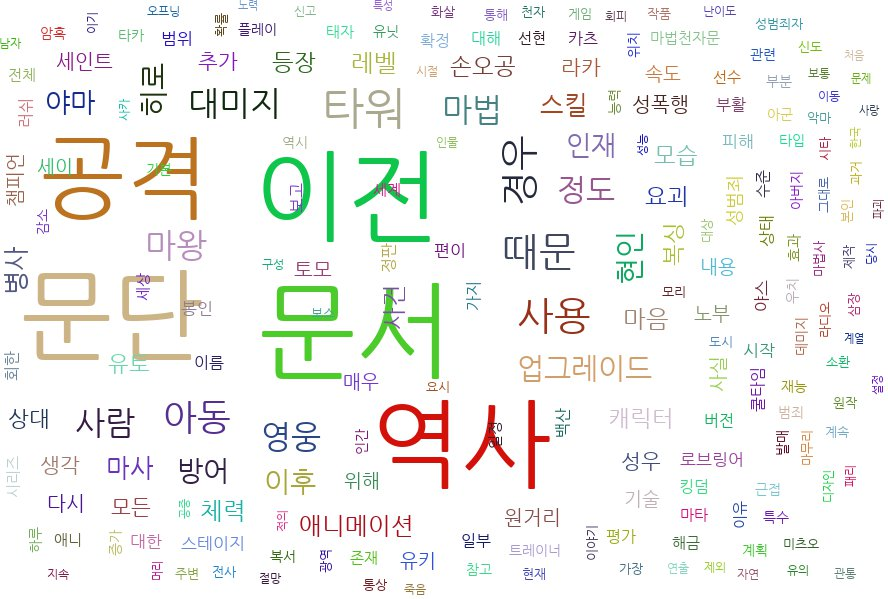

In [18]:
# 폰트 추가 후 노트북 재시작
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(200)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=100)

pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900,600), fontname='NanumGothic', rectangular=False)

from IPython.display import Image
Image(filename='wordcloud.jpg')